In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy

In [2]:
X=np.load("./X.npy")
Y=np.load("./y.npy")
X=X[0:1000]
Y=Y[0:1000]

In [3]:
print(f"shape of features : {X.shape} \nshape of target : {Y.shape}")

shape of features : (1000, 400) 
shape of target : (1000, 1)


In [4]:
print(f"features : {X[1]} \n\n target first : {Y[0]} last : {Y[-1]} ")

features : [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  3.22856793e-04 -9.15576210e-04 -2.53532265e-02
 -3.85931128e-02 -3.84044678e-02 -1.93746688e-02  3.90933920e-04
  8.19371408e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+

In [12]:
X_resized=[]
for i in X:
    X_resized.append(i.reshape((20,20)))

In [15]:
X_resized=np.array(X_resized)
X_resized.shape

(1000, 20, 20)

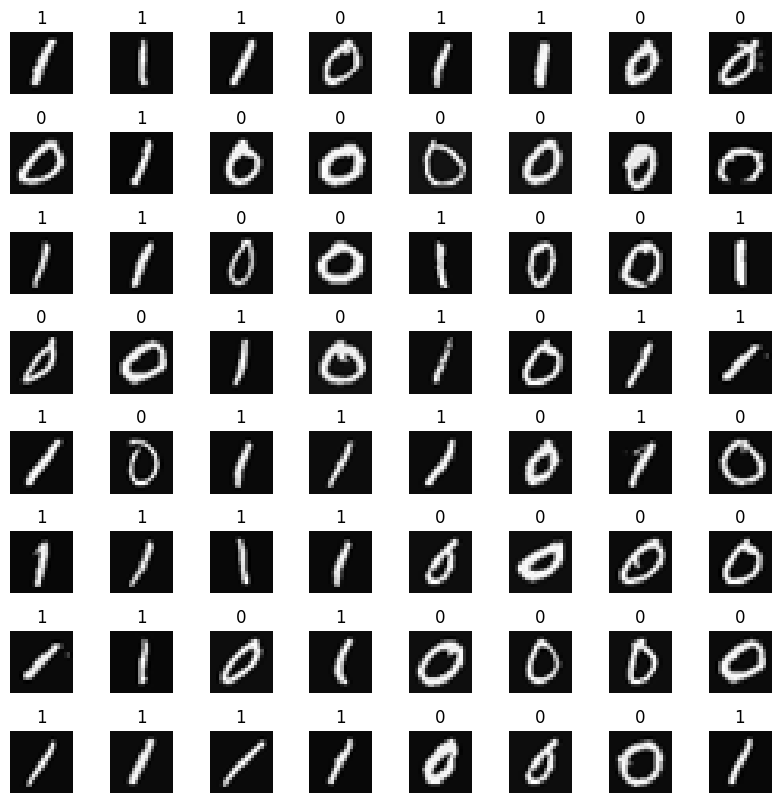

In [5]:
m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T  #since its a 400 pixels which is 20x20
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(Y[random_index,0])
    ax.set_axis_off() 

Model

In [6]:
model=Sequential([
    tf.keras.Input(shape=(400,)),
    Dense(units=25,activation='sigmoid',name='layer_1'),
    Dense(units=15,activation='sigmoid',name='layer_2'),
    Dense(units=1,activation='sigmoid',name='layer_3'),
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 25)                10025     
                                                                 
 layer_2 (Dense)             (None, 15)                390       
                                                                 
 layer_3 (Dense)             (None, 1)                 16        
                                                                 
Total params: 10431 (40.75 KB)
Trainable params: 10431 (40.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
[layer_1,layer_2,layer_3]=model.layers
W1,b1=layer_1.get_weights()
W2,b2=layer_2.get_weights()
W3,b3=layer_3.get_weights()
print(f"Weight and bias of layer_1 : {W1.shape} , {b1.shape}")
print(f"Weight and bias of layer_2 : {W2.shape} , {b2.shape}")
print(f"Weight and bias of layer_3 : {W3.shape} , {b3.shape}")

Weight and bias of layer_1 : (400, 25) , (25,)
Weight and bias of layer_2 : (25, 15) , (15,)
Weight and bias of layer_3 : (15, 1) , (1,)


In [9]:
model.compile(loss=BinaryCrossentropy())
model.fit(X,Y,epochs=40)


Epoch 1/40

32/32 [==============================] - 1s 3ms/step - loss: 0.6066
Epoch 2/40
32/32 [==============================] - 0s 3ms/step - loss: 0.4445
Epoch 3/40
32/32 [==============================] - 0s 2ms/step - loss: 0.3074
Epoch 4/40
32/32 [==============================] - 0s 3ms/step - loss: 0.2101
Epoch 5/40
32/32 [==============================] - 0s 2ms/step - loss: 0.1443
Epoch 6/40
32/32 [==============================] - 0s 1ms/step - loss: 0.1019
Epoch 7/40
32/32 [==============================] - 0s 2ms/step - loss: 0.0738
Epoch 8/40
32/32 [==============================] - 0s 1ms/step - loss: 0.0547
Epoch 9/40
32/32 [==============================] - 0s 2ms/step - loss: 0.0422
Epoch 10/40
32/32 [==============================] - 0s 1ms/step - loss: 0.0331
Epoch 11/40
32/32 [==============================] - 0s 2ms/step - loss: 0.0268
Epoch 12/40
32/32 [==============================] - 0s 2ms/step - loss: 0.0220
Epoch 13/40
32/32 [============================

In [10]:
[layer_1,layer_2,layer_3]=model.layers
W1,b1=layer_1.get_weights()
W2,b2=layer_2.get_weights()
W3,b3=layer_3.get_weights()
print(f"Weight and bias of layer_1 : {W1[0]} , {b1[0]}")
print(f"Weight and bias of layer_2 : {W2[0]} , {b2[0]}")
print(f"Weight and bias of layer_3 : {W3[0]} , {b3[0]}")

Weight and bias of layer_1 : [-0.00900459 -0.10442361  0.02146442  0.03933322 -0.01857764 -0.06644618
 -0.04182077 -0.00248026 -0.06808899  0.0971542   0.08055086  0.02671079
  0.07066575 -0.00675379 -0.08486694 -0.05658885 -0.0977437  -0.11517961
  0.10763676 -0.05311177 -0.04429605  0.04780091 -0.08272467 -0.02857214
 -0.1169939 ] , -0.0852523073554039
Weight and bias of layer_2 : [-0.2309579  -0.6855755  -0.21939361 -0.5673761   0.06345598  0.43416914
 -0.61251104  0.23763153 -0.03344376  0.05820969  0.2340628   0.37445042
  0.04304108  0.25191396  0.05267169] , -0.2162252962589264
Weight and bias of layer_3 : [0.9159197] , 0.17360836267471313


1/1 [==============================] - 0s 28ms/step


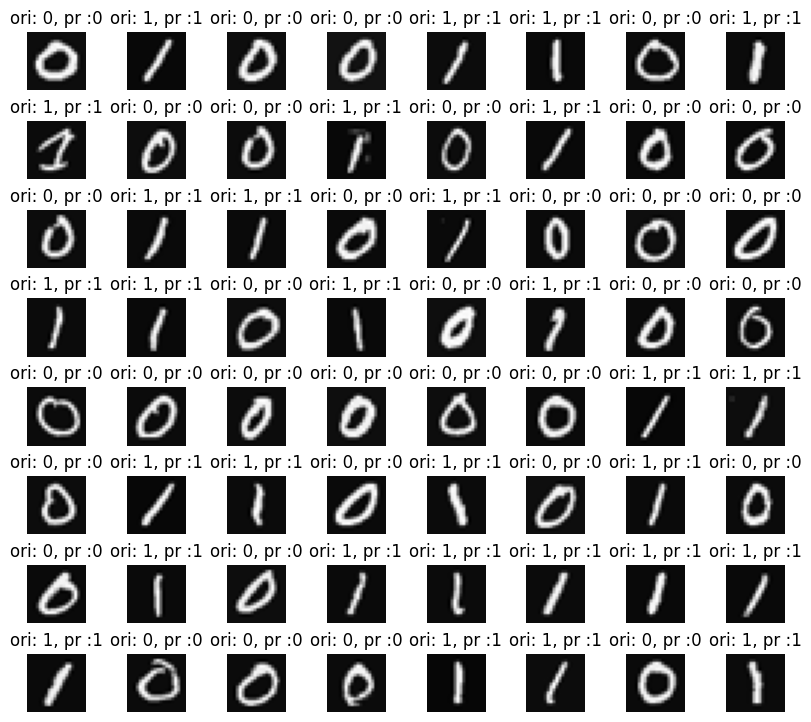

In [11]:
m,n=X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92])

for i,ax in enumerate(axes.flat):
    index=np.random.randint(m)
    X_resized=X[index].reshape((20,20)).T
    ax.imshow(X_resized,cmap='grey')

    predict=model.predict(X[index].reshape(1,400))
    if predict >=0.5:
        yhat=1
    else:
        yhat=0
    ax.set_title(f"ori: {Y[index,0]}, pr :{yhat}")



    ax.set_axis_off()